In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from afc.rctuning.optimizer import RcTuning
from afc.rctuning.defaultConfig import TUNING_MODES
from afc.rctuning.utility import plot_standard1

### Load Dataset

In [3]:
inputs = pd.read_csv('example_rctuning_withlowe.csv', index_col=0)
inputs.index = pd.to_datetime(inputs.index)

### Test on Dataset

In [4]:
# initialize tuner
rctuner = RcTuning(rctype='R4C2',
                   lhs_samples=5,
                   horizon=7*24*60*60,
                   resample='15min')

# run tuner
res = rctuner.do_tuning(inputs=inputs)

# result
print('The tuner reached optimality?', res['optimal'])
res['res_lhs']

The tuner reached optimality? True


,Rw2i,Ci,Ris,Cs,Row1,Rw1w2,duration,objective,termination
0,1.673366e-07,1.157383e+06,0.000740,1.494506e+08,0.002651,0.015869,5.326788,0.052947,optimal
1,1.827465e-04,1.261549e+06,0.000730,1.064023e+09,0.001538,0.010011,5.387017,0.062908,optimal
2,5.029864e-03,1.270438e+06,0.000724,3.890204e+09,0.001330,0.003920,4.604416,0.066089,optimal
3,5.441940e-03,1.271774e+06,0.000723,5.313430e+09,0.001307,0.003376,5.746632,0.066551,optimal
4,5.520924e-03,1.272063e+06,0.000723,5.736863e+09,0.001303,0.003271,10.716136,0.066649,optimal


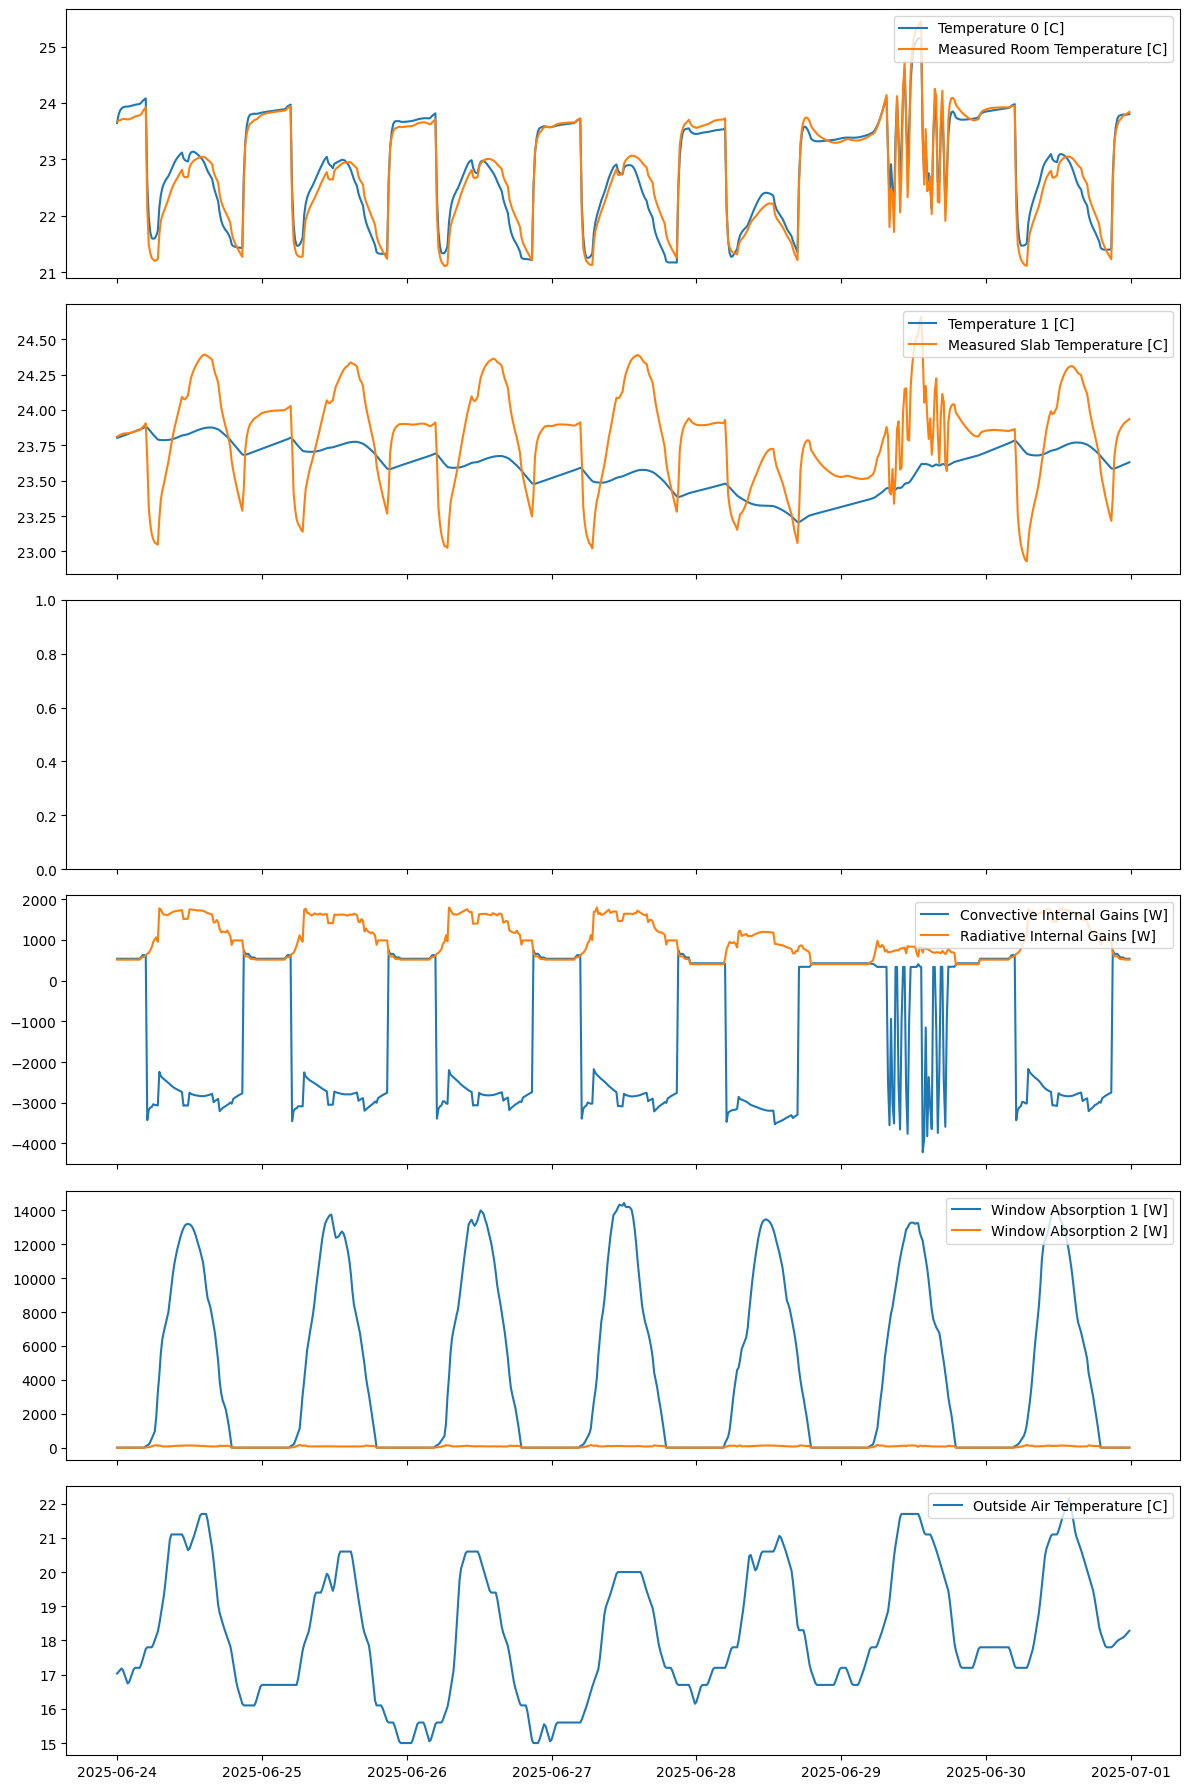

In [5]:
plot_standard1(res['df'])

### Test different RC models

In [6]:
rctypes = {k: v[-1] for k, v in TUNING_MODES.items()}

stats = {}
for rctype, mode in rctypes.items():

    print(f'Tuning type {rctype}...')
    stats[rctype] = []

    # init tuner
    rctuner = RcTuning(rctype=rctype,
                       mode=mode,
                       horizon=5*24*60*60,
                       resample='15min')
    # run tuner
    for runs in range(2):
        stats[rctype].append(rctuner.do_tuning(inputs=inputs))


Tuning type R1C1...
Tuning type R2C2...
Tuning type R4C2...
Tuning type R5C2...
Tuning type R5C3...
Tuning type R6C3...


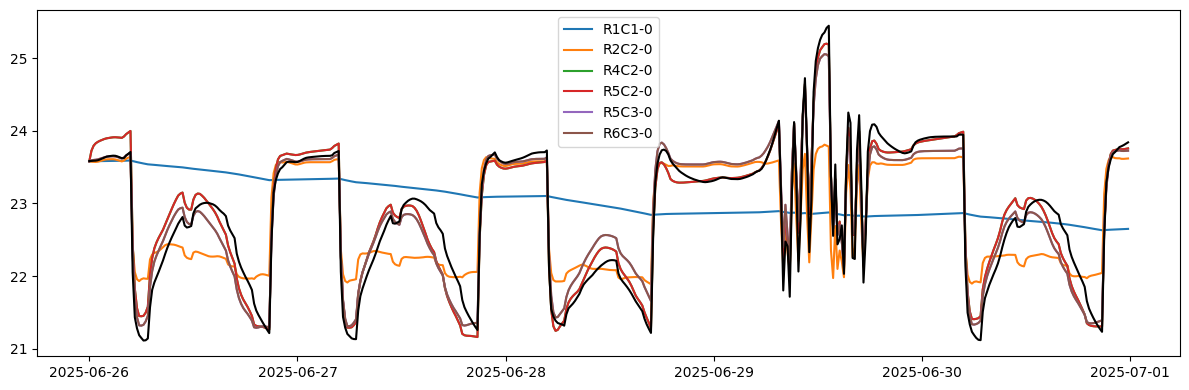

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(12, 4))
durations = {}
objectives = {}
for rctype, mode in rctypes.items():
    for si, stat in enumerate(stats[rctype][:1]):
        label = f'{rctype}-{si}'
        durations[label] = stat['duration']
        objectives[label] = stat['objective']
        axs.plot(stat['df']['Temperature 0 [C]'], label=label)
axs.legend()
axs.plot(stats[rctype][0]['df']['Measured Room Temperature [C]'], color='black')
plt.tight_layout()
plt.show()

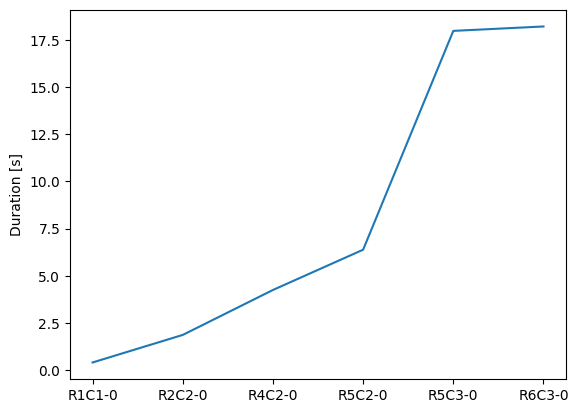

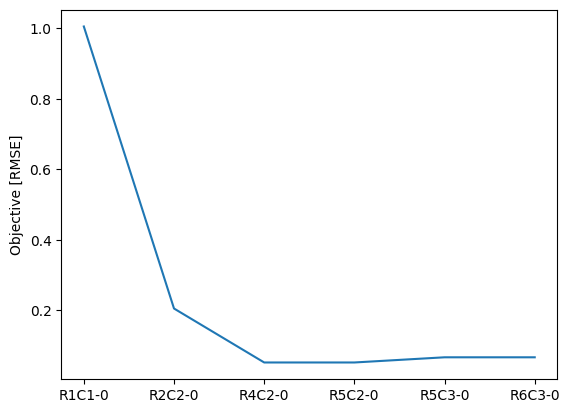

In [8]:
pd.Series(durations).plot()
plt.ylabel('Duration [s]')
plt.show()

pd.Series(objectives).plot()
plt.ylabel('Objective [RMSE]')
plt.show()